<a href="https://colab.research.google.com/github/Vishwas2505/seaborn-module-python/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer_support_data.csv')
df.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
df.shape
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [ ]:
# Handle missing values

#Numeric columns — fill with mean
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# Object (string/categorical) columns — fill with mode (most frequent value)
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    mode_value = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
    df[col].fillna(mode_value, inplace=True)

#Check if any missing values remain
print("Missing values after imputation:")
print(df.isnull().sum())


/tmp/ipython-input-1211751462.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
/tmp/ipython-input-1211751462.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Missing values after imputation:
Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64


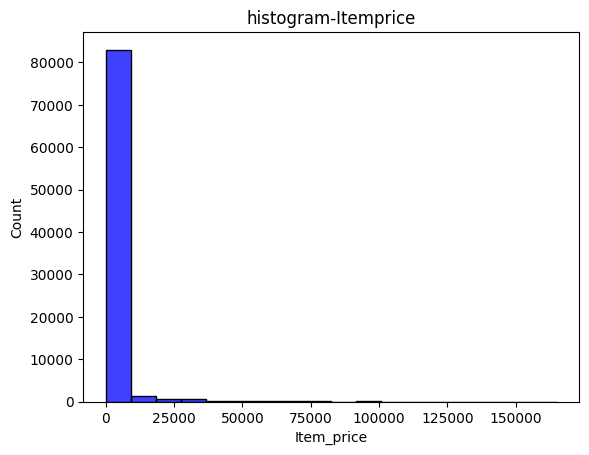

In [ ]:
#A.1.Numerical columns
sns.histplot(df['Item_price'],color='blue')
plt.title("histogram-Itemprice")
plt.show()

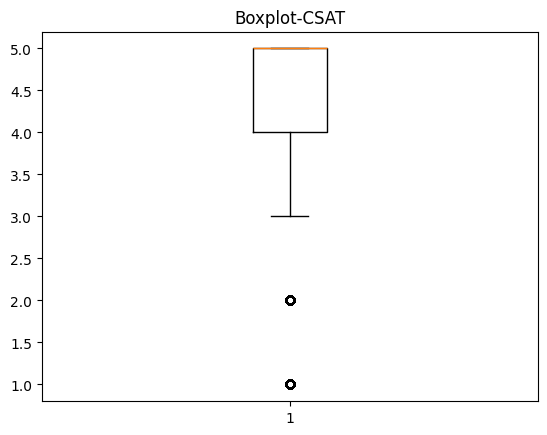

In [ ]:
#A.2.CSAT
plt.boxplot(x='CSAT Score',data=df)
plt.title("Boxplot-CSAT")
plt.show()

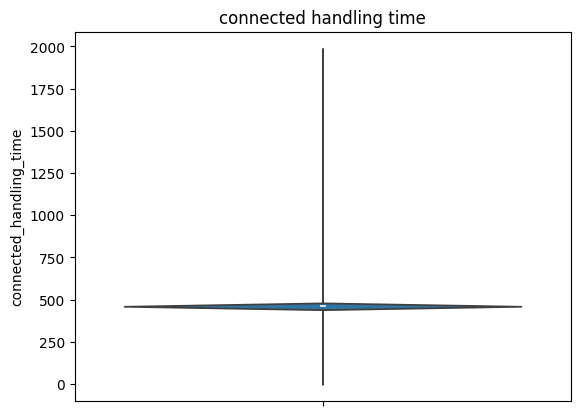

In [ ]:
sns.violinplot(df['connected_handling_time'])
plt.title("connected handling time")
plt.show()

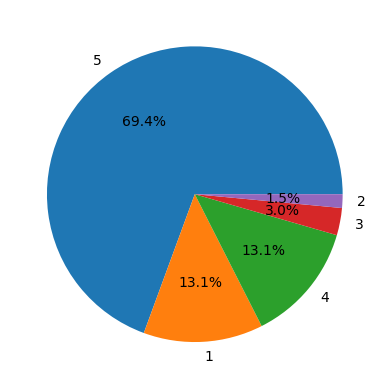

In [ ]:
#pie chart CAST
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
c=df['CSAT Score'].value_counts()
plt.pie(c,labels=c.index,autopct='%1.1f%%')
plt.show()

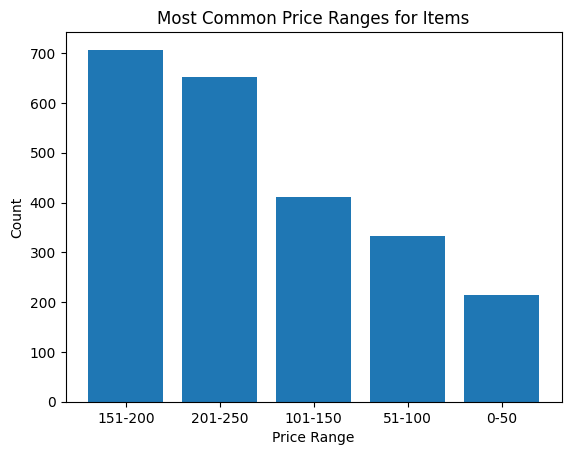

In [ ]:
#5.“What are the most common price ranges for items?” → Binned bar chart
price_bins = [0, 50, 100, 150,200,250]
price_labels = ['0-50', '51-100', '101-150','151-200','201-250']
df['Item_price_range'] = pd.cut(df['Item_price'], bins=price_bins, labels=price_labels)
price_range_counts=df['Item_price_range'].value_counts()
plt.bar(price_range_counts.index,price_range_counts.values)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Most Common Price Ranges for Items')
plt.show()

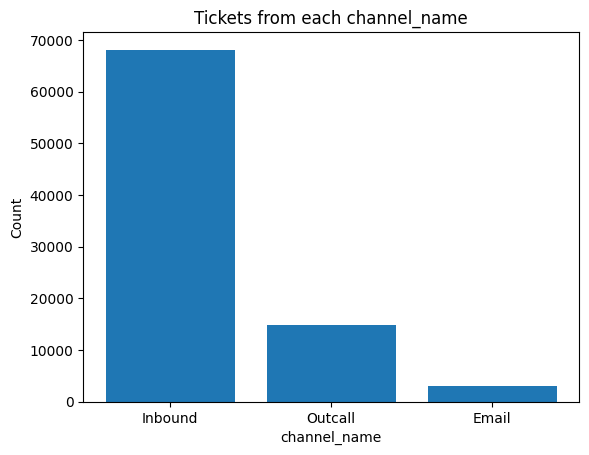

In [ ]:
# 6. “How many tickets come from each channel_name?” → Bar chart
channel_name_counts=df['channel_name'].value_counts()
plt.bar(channel_name_counts.index,channel_name_counts.values)
plt.xlabel('channel_name')
plt.ylabel('Count')
plt.title('Tickets from each channel_name')
plt.show()

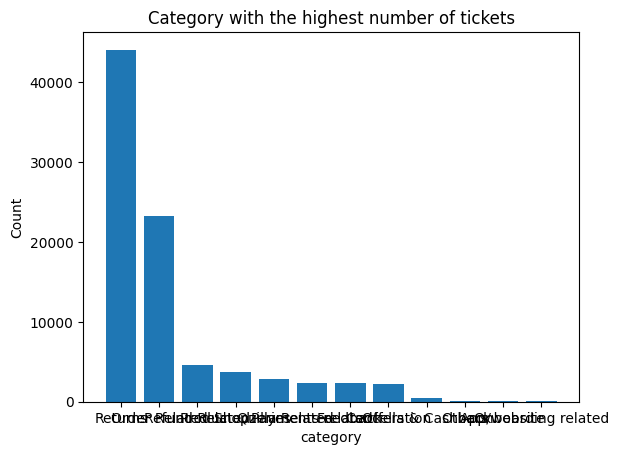

In [ ]:
# 7. “Which category has the highest number of tickets?” → Bar chart (sorted)
category_counts=df['category'].value_counts()
plt.bar(category_counts.index,category_counts.values)
plt.xlabel('category')
plt.ylabel('Count')
plt.title('Category with the highest number of tickets')
plt.show()

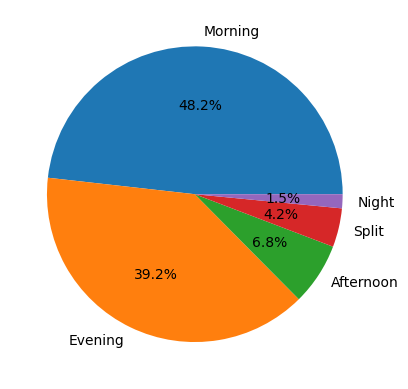

In [ ]:
# 8. “Show me the distribution of tickets by Agent Shift.” → Pie chart
agent_shift_counts=df['Agent Shift'].value_counts()
plt.pie(agent_shift_counts,labels=agent_shift_counts.index,autopct='%1.1f%%')
plt.show()

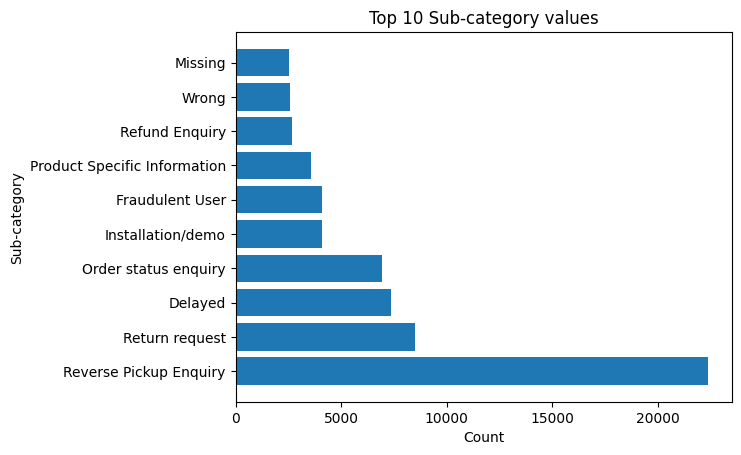

In [ ]:
# 9. “What are the top 10 Sub-category values?” → Horizontal bar chart
ss=df['Sub-category'].value_counts().head(10)
plt.barh(ss.index,ss.values)
plt.xlabel('Count')
plt.ylabel('Sub-category')
plt.title('Top 10 Sub-category values')
plt.show()

<BarContainer object of 5 artists>

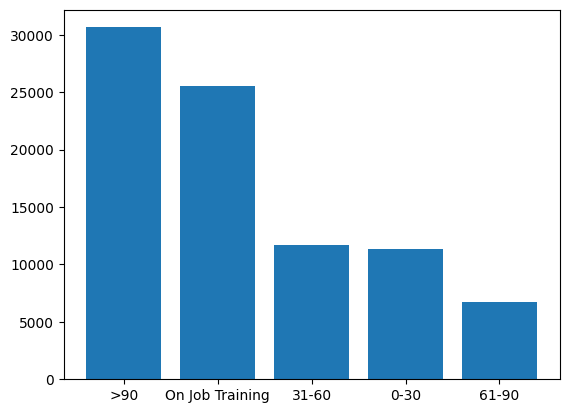

In [ ]:
# 10. “How many tickets belong to each Tenure Bucket?” → Bar chart
tenure_bucket_counts=df['Tenure Bucket'].value_counts()
plt.bar(tenure_bucket_counts.index,tenure_bucket_counts.values)

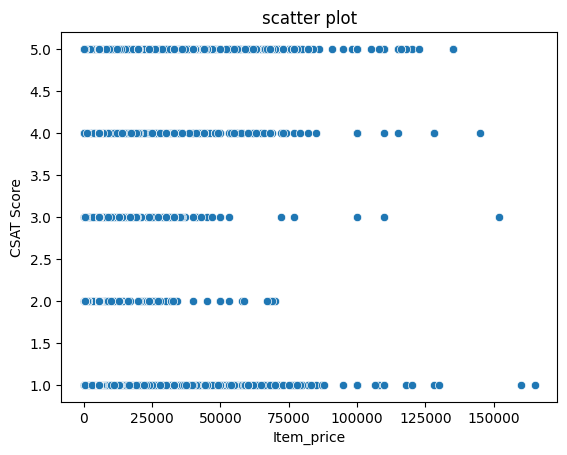

In [ ]:
 #2. A. Numerical vs Numerical
 # 11. “Is there a relationship between Item_price and CSAT Score?” → Scatter plot
sns.scatterplot(x='Item_price',y='CSAT Score',data=df)
plt.title("scatter plot")
plt.show()

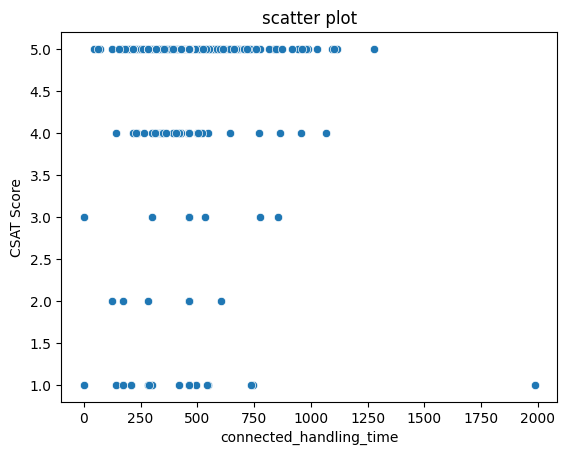

In [ ]:
# 12. “How does connected_handling_time affect CSAT Score?” → Scatter plot + trend line
sns.scatterplot(x='connected_handling_time',y='CSAT Score',data=df)
plt.title("scatter plot")
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-2947433879.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
/tmp/ipython-input-2947433879.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

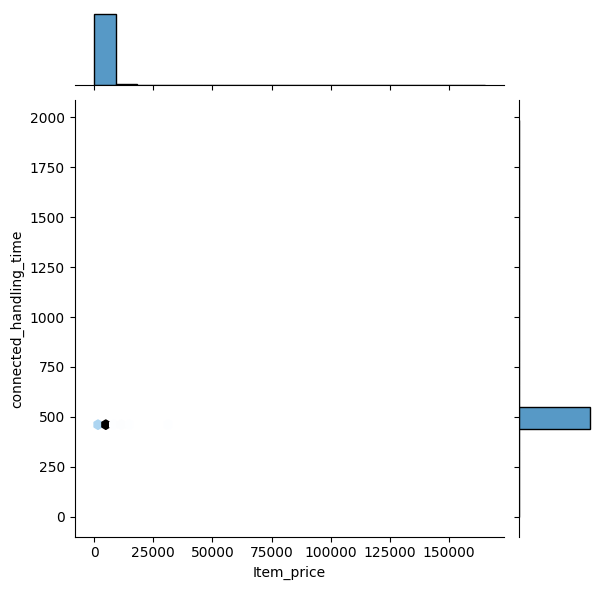

In [ ]:
#13. “Show me density or clusters of Item_price vs connected_handling_time.” → Hexbin plot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Load the dataframe
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer_support_data.csv')

# Convert relevant columns to numeric, coercing errors
df['Item_price'] = pd.to_numeric(df['Item_price'], errors='coerce')
df['connected_handling_time'] = pd.to_numeric(df['connected_handling_time'], errors='coerce')


# Handle missing values
#Numeric columns — fill with mean
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# Object (string/categorical) columns — fill with mode (most frequent value)
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    mode_value = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
    df[col].fillna(mode_value, inplace=True)


sns.jointplot(x='Item_price',y='connected_handling_time',data=df,kind='hex')
plt.show()

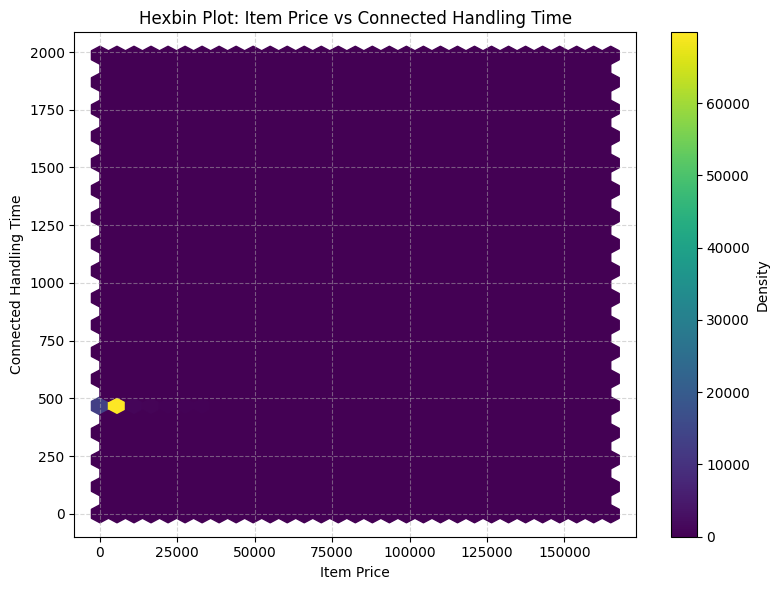

In [ ]:
#13. “Show me density or clusters of Item_price vs connected_handling_time.” → Hexbin plot
plt.figure(figsize=(8,6))
plt.hexbin(df['Item_price'], df['connected_handling_time'], gridsize=30, cmap='viridis')

# Add labels and colorbar
plt.colorbar(label='Density')
plt.xlabel('Item Price')
plt.ylabel('Connected Handling Time')
plt.title('Hexbin Plot: Item Price vs Connected Handling Time')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

<BarContainer object of 3 artists>

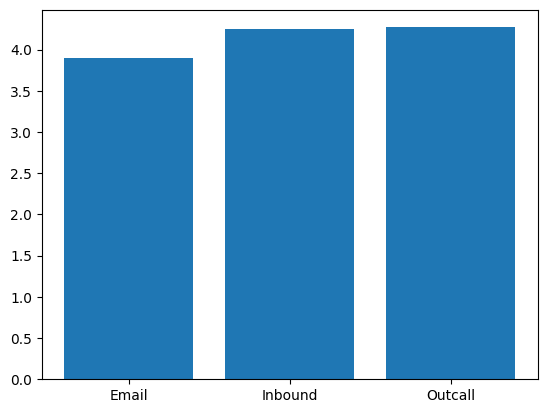

In [ ]:
#14. “What is the average CSAT Score per channel_name?” → Grouped bar chart
csat_per_channel=df.groupby('channel_name')['CSAT Score'].mean()
plt.bar(csat_per_channel.index,csat_per_channel.values)

<Axes: xlabel='category', ylabel='Item_price'>

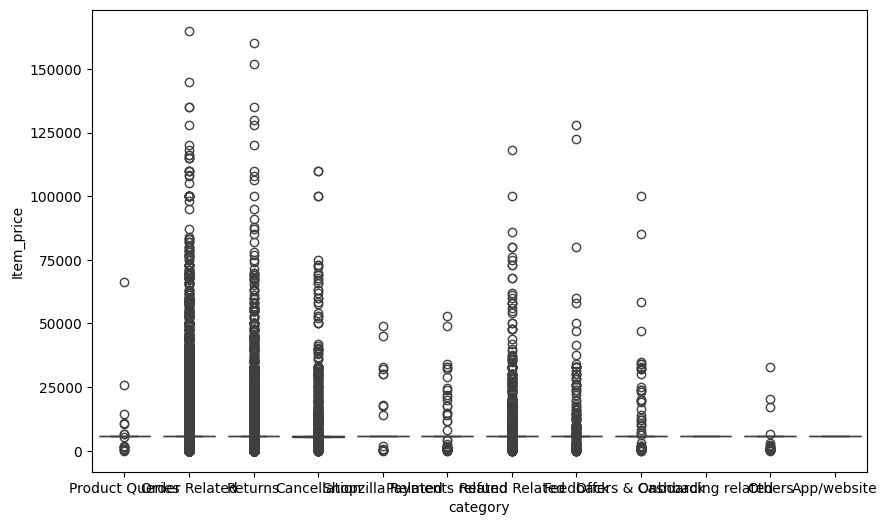

In [ ]:
#15. “Show distribution of Item_price per category.” → Multiple boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='Item_price', data=df)

<Axes: xlabel='Agent Shift', ylabel='connected_handling_time'>

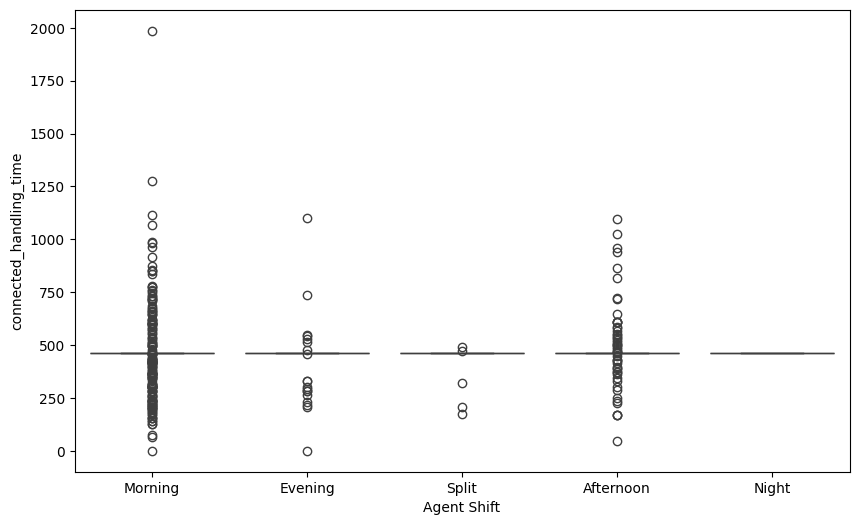

In [ ]:
# 16. “How does connected_handling_time vary by Agent Shift?” → Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Agent Shift', y='connected_handling_time', data=df)

<ErrorbarContainer object of 3 artists>

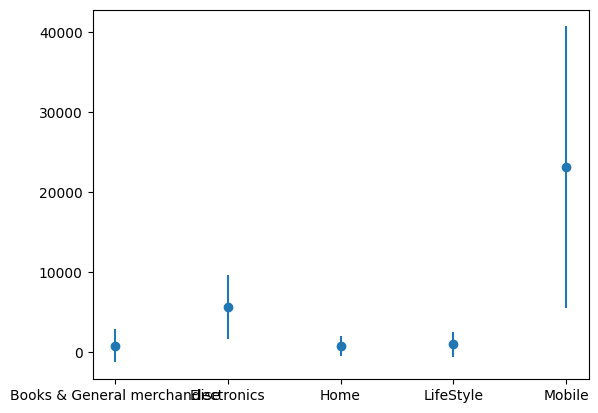

In [ ]:
# 17. “Show mean and variability of Item_price across top 5 Product_category.” → Error bar plot
top_5_categories = df['Product_category'].value_counts().head(5).index
category_means = df[df['Product_category'].isin(top_5_categories)].groupby('Product_category')['Item_price'].mean()
category_std_devs = df[df['Product_category'].isin(top_5_categories)].groupby('Product_category')['Item_price'].std()
plt.errorbar(x=category_means.index, y=category_means.values, yerr=category_std_devs.values, fmt='o')

<BarContainer object of 5 artists>

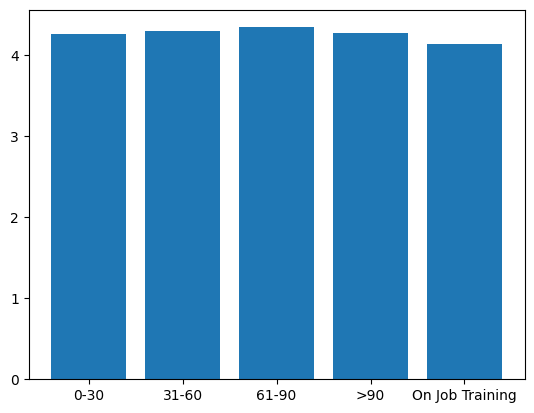

In [ ]:
# 18. “How do CSAT scores differ across Tenure Bucket?” → Bar chart
csat_per_tenure=df.groupby('Tenure Bucket')['CSAT Score'].mean()
plt.bar(csat_per_tenure.index,csat_per_tenure.values)

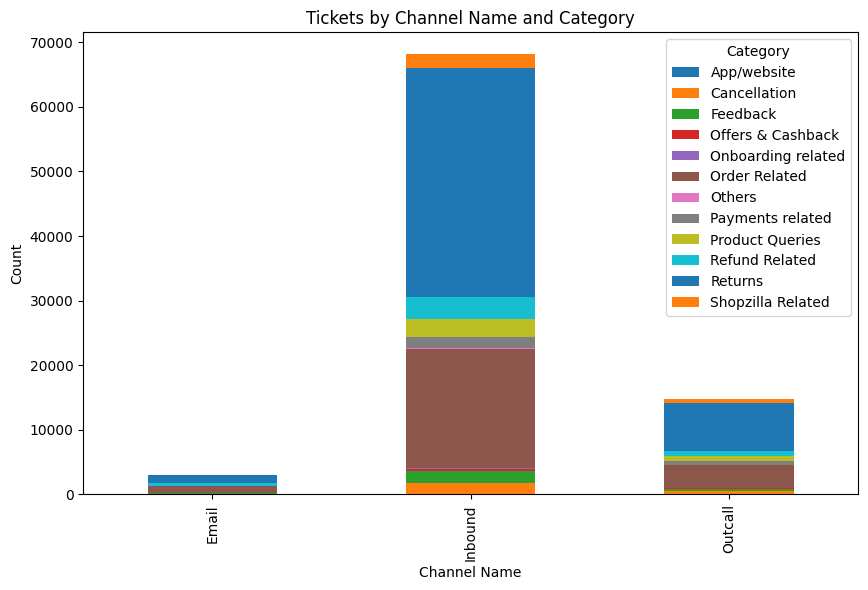

In [ ]:
# 19. “Show the number of tickets by channel_name and category together.” → Stacked bar chart
channel_category_counts = df.groupby(['channel_name', 'category']).size().unstack(fill_value=0)
channel_category_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Channel Name')
plt.ylabel('Count')
plt.title('Tickets by Channel Name and Category')
plt.legend(title='Category')
plt.show()

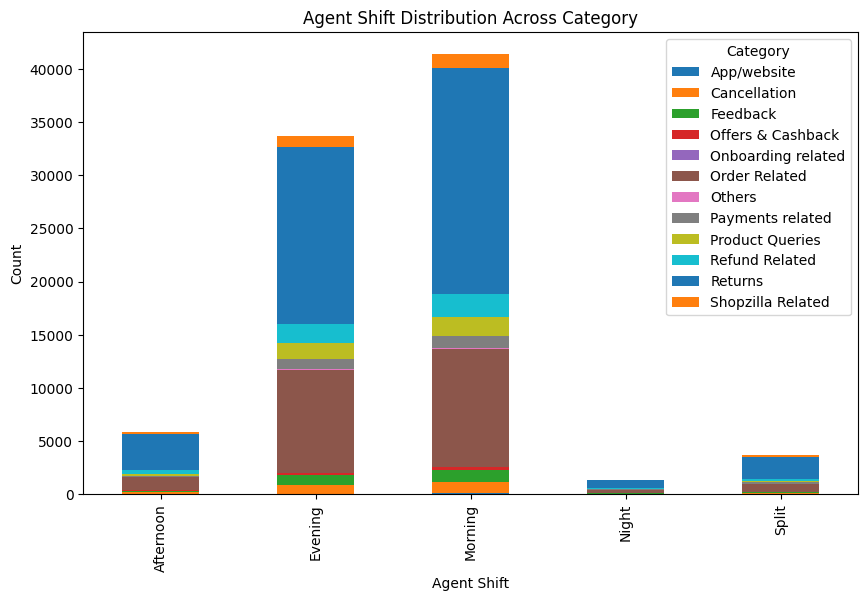

In [ ]:
# 20. “How does Agent Shift distribution differ across category?” → Stacked bar or grouped bar chart
agent_shift_category_counts = df.groupby(['Agent Shift', 'category']).size().unstack(fill_value=0)
agent_shift_category_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Agent Shift')
plt.ylabel('Count')
plt.title('Agent Shift Distribution Across Category')
plt.legend(title='Category')
plt.show()


/tmp/ipython-input-3758398154.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date_time'] = pd.to_datetime(df['order_date_time'])


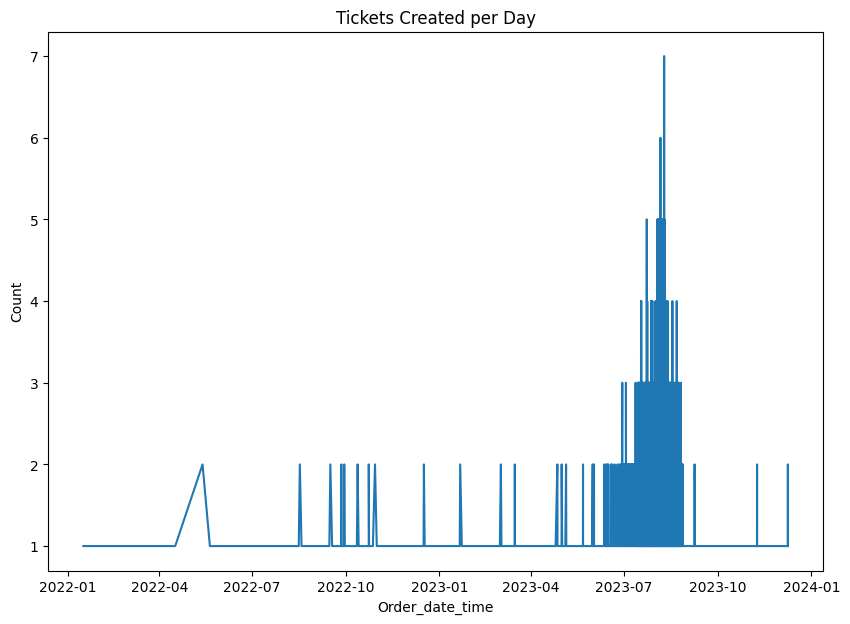

In [4]:
#“How many tickets were created per day?” → Line plot
plt.figure(figsize=(10, 7))
df['order_date_time'] = pd.to_datetime(df['order_date_time'])
daily_ticket_counts = df.groupby('order_date_time').size()
plt.plot(daily_ticket_counts.index, daily_ticket_counts.values)
plt.xlabel('Order_date_time')
plt.ylabel('Count')
plt.title('Tickets Created per Day')
plt.show()

In [8]:
# Handle missing values

#Numeric columns — fill with mean
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# Object (string/categorical) columns — fill with mode (most frequent value)
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    mode_value = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
    df[col].fillna(mode_value, inplace=True)

#Check if any missing values remain
print("Missing values after imputation:")
print(df.isnull().sum())


/tmp/ipython-input-1211751462.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
/tmp/ipython-input-1211751462.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Missing values after imputation:
Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64


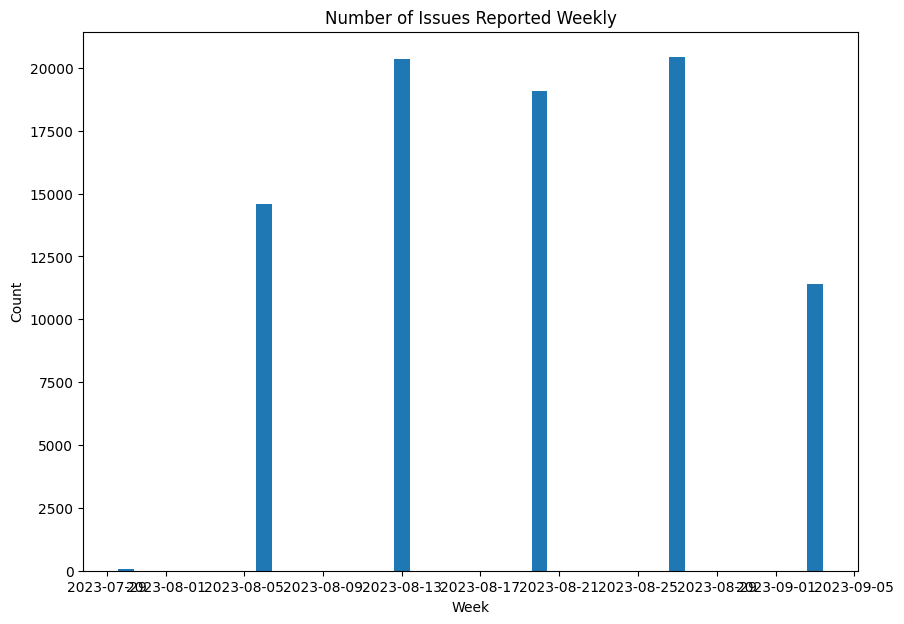

In [10]:
#“Plot number of issues reported weekly.” → Bar chart (aggregated)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
weekly_issue_counts = df.groupby(pd.Grouper(key='Issue_reported at', freq='W')).size()
plt.bar(weekly_issue_counts.index, weekly_issue_counts.values)
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Number of Issues Reported Weekly')
plt.show()

/tmp/ipython-input-1938774314.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ticket_counts = df.groupby(pd.Grouper(key='Issue_reported at', freq='M')).size()


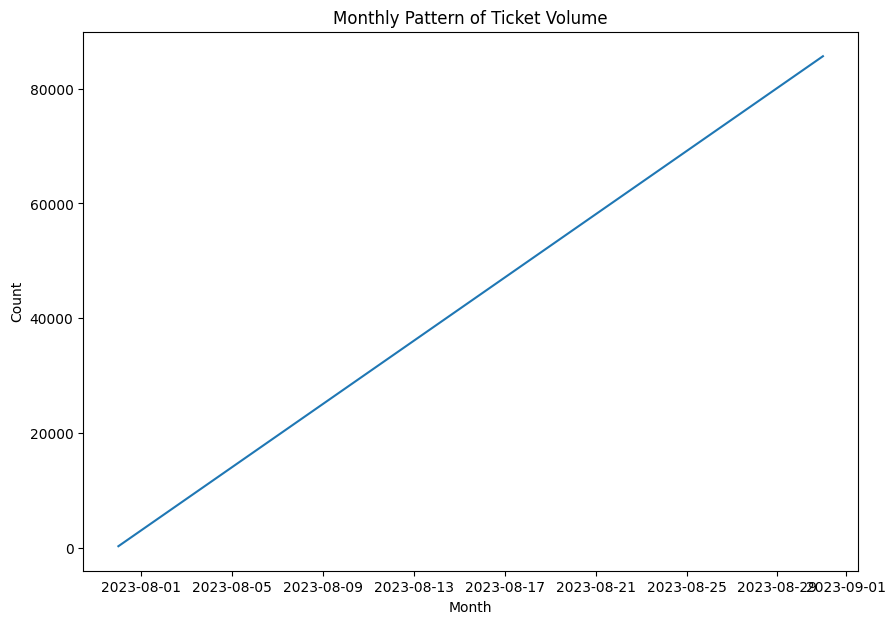

In [11]:
plt.figure(figsize=(10, 7))
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
monthly_ticket_counts = df.groupby(pd.Grouper(key='Issue_reported at', freq='M')).size()
plt.plot(monthly_ticket_counts.index, monthly_ticket_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Pattern of Ticket Volume')
plt.show()

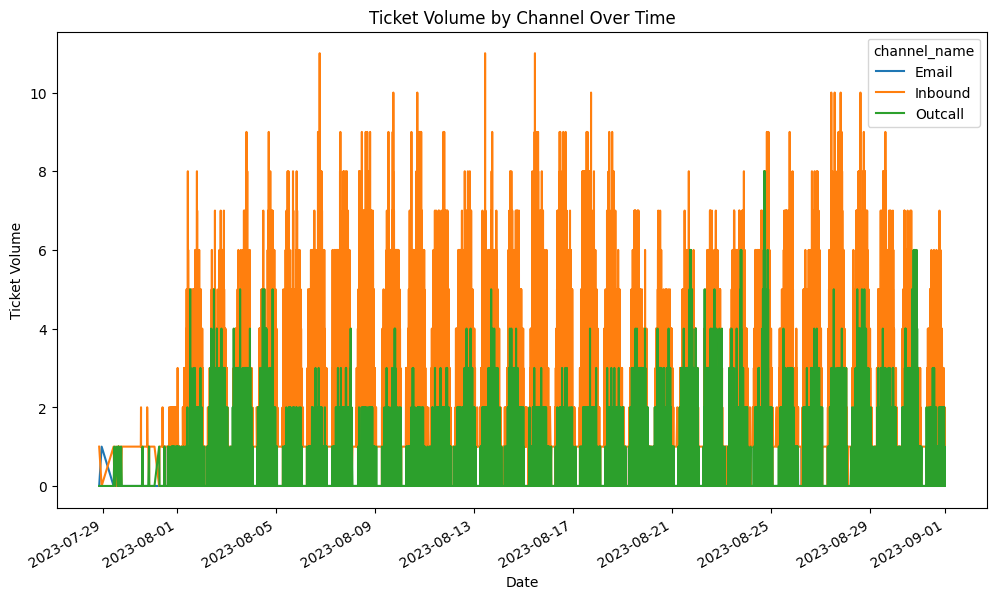

In [12]:
import matplotlib.pyplot as plt
channel_time_counts = df.groupby(['Issue_reported at', 'channel_name']).size().unstack(fill_value=0)
channel_time_counts.plot(figsize=(12, 7))
plt.xlabel('Date')
plt.ylabel('Ticket Volume')
plt.title('Ticket Volume by Channel Over Time')
plt.show()

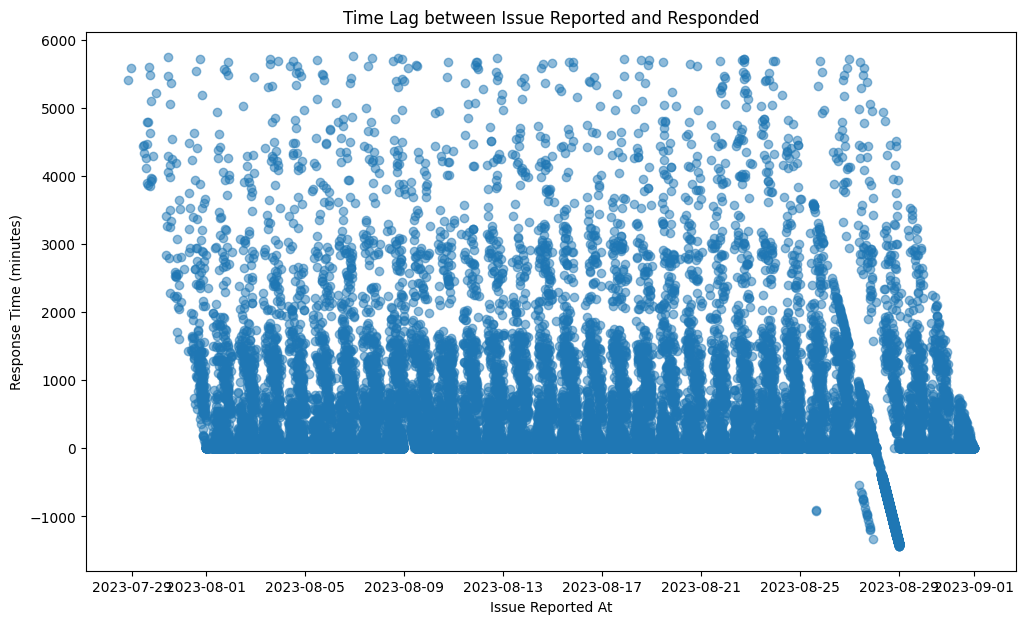

In [13]:
#“Show the time lag between Issue_reported at and issue_responded.” → Line or scatter plot (response time trend)
import matplotlib.pyplot as plt

df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M')
df['response_time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60  # in minutes

plt.figure(figsize=(12, 7))
plt.scatter(df['Issue_reported at'], df['response_time'], alpha=0.5)
plt.xlabel('Issue Reported At')
plt.ylabel('Response Time (minutes)')
plt.title('Time Lag between Issue Reported and Responded')
plt.show()

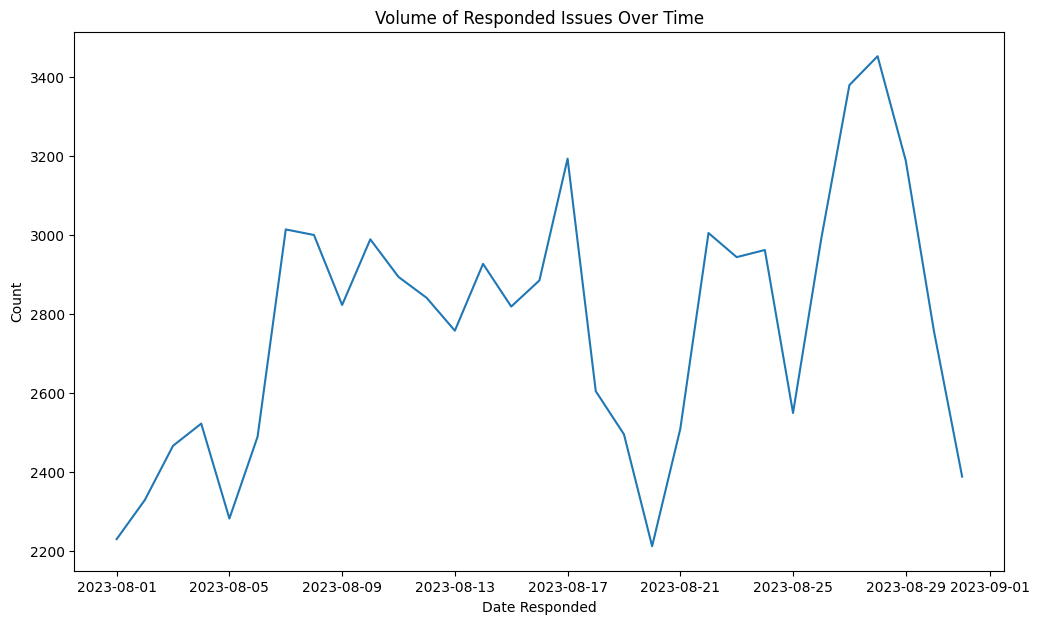

In [14]:
plt.figure(figsize=(12, 7))
df_responded = df.dropna(subset=['issue_responded'])
responded_counts = df_responded.groupby(pd.Grouper(key='issue_responded', freq='D')).size()
plt.plot(responded_counts.index, responded_counts.values)
plt.xlabel('Date Responded')
plt.ylabel('Count')
plt.title('Volume of Responded Issues Over Time')
plt.show()

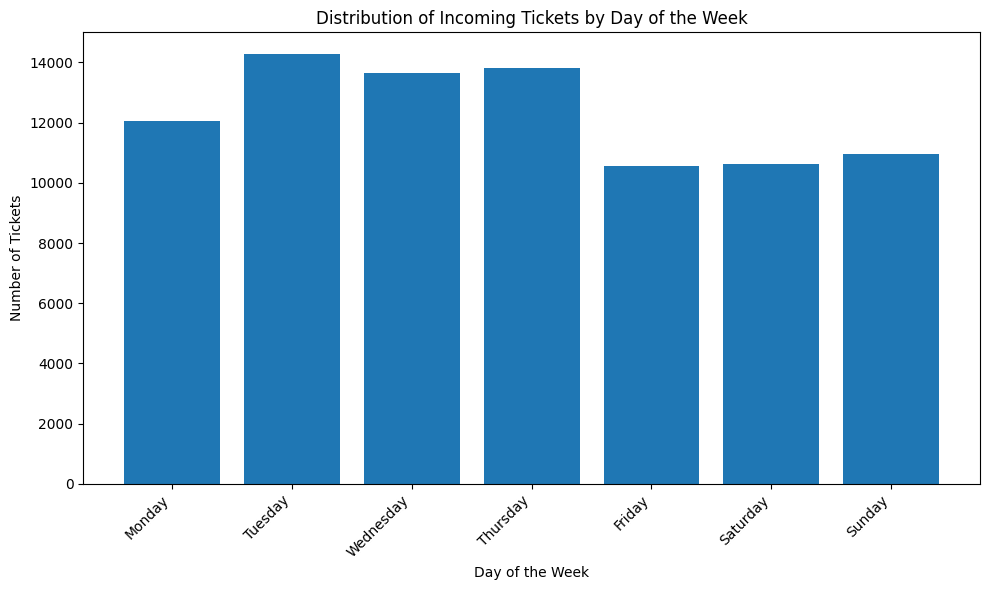

In [15]:
import matplotlib.pyplot as plt

df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'])
df['day_of_week'] = df['Issue_reported at'].dt.day_name()
daily_counts = df['day_of_week'].value_counts()

# Order the days of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = daily_counts.reindex(order)

plt.figure(figsize=(10, 6))
plt.bar(daily_counts.index, daily_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tickets')
plt.title('Distribution of Incoming Tickets by Day of the Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()